In [15]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [2]:
f = np.array([3, 7, 14, 23, 36, 47])
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [3]:
a, b = symbols('a b')
f = (5 - a - 2*b)**2
dfa = f.diff(a)
dfa

2*a + 4*b - 10

In [4]:
dfb = f.diff(b)
dfb

4*a + 8*b - 20

In [5]:
p = {a: 1, b: 1}
print(dfa.subs(p))
print(dfb.subs(p))

-4
-8


In [6]:
solve([Eq(dfa, 0), Eq(dfb, 0)], [a, b])

{a: 5 - 2*b}

In [7]:
f = (2.1 - a - b)**2 + (2.9 - a - 3*b)**2 + (4.1 - a - 5*b)**2
dfa = f.diff(a)
dfb = f.diff(b)
print(dfa)
print(dfb) 

6.0*a + 18.0*b - 18.2
18.0*a + 70.0*b - 62.6


In [8]:
solve([dfa, dfb], a, b)

{a: 1.53333333333333, b: 0.500000000000000}

In [9]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

In [10]:
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

In [12]:
def fun(x, y, a = 1, b = 1):
    return a * (x**2) + b*(y**2)

In [13]:
def grad(x, y, a = 1, b = 1):
    return np.array([2 * a * x, 2 * b * y])

In [18]:
def graf_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size=2)
    lst.append(x)
    print(lst)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [22]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(20, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

[array([1.09265359, 1.51504527])]


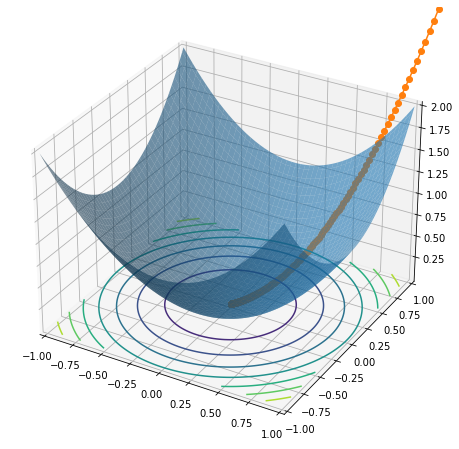

In [43]:
trace = graf_descend(grad, 0.01, 1000)
plot_grad(fun, trace=trace)

In [44]:
x, y, z = symbols('x y z')
f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z

In [46]:
dfx = f.diff(x)
dfx

4*x - 4*z + 4

In [47]:
dfy = f.diff(y)
dfy

8*y - 8*z + 8

In [48]:
dfz = f.diff(z)
dfz

-4*x - 8*y + 18*z - 20

In [50]:
p = np.array([0, 0, 0])


In [52]:
pk = {x:p[0], y:p[1], z:p[2]}

In [54]:
p1 = p - 0.25*np.array([dfx.subs(pk), dfy.subs(pk), dfz.subs(pk)])
p1

array([-1.00000000000000, -2.00000000000000, 5.00000000000000],
      dtype=object)